In [28]:
from sklearn import tree
from sklearn.model_selection import train_test_split
#import graphviz
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz

from sklearn.cluster import KMeans

from graphviz import Source
from sklearn.metrics import accuracy_score

from scipy.spatial import distance as distance

import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import time
%matplotlib inline

In [2]:
data = pd.read_csv('../data/California_Wines.csv')

In [3]:
len(data.region_1.unique())
data.region_1.dropna(inplace=True)
data.region_1.unique()

array(['Napa Valley', 'Alexander Valley', 'Central Coast', 'Paso Robles',
       'Sonoma Coast', 'Clarksburg', 'Dry Creek Valley', 'Sonoma Valley',
       'Lake County', 'North Coast', 'Santa Ynez Valley', 'California',
       'Howell Mountain', 'Calistoga', 'Knights Valley', 'Sonoma County',
       'Santa Clara Valley', 'Yountville', 'Rockpile',
       'Santa Lucia Highlands', 'Spring Mountain District', 'Monterey',
       'Carmel Valley', 'Santa Cruz Mountains', 'Edna Valley',
       'Russian River Valley', 'Arroyo Seco', 'Anderson Valley',
       'Nevada County', 'Santa Barbara County',
       'Diamond Mountain District', 'Mendocino', 'Sonoma Mountain',
       'Amador County', 'St. Helena', 'Cole Ranch', 'Santa Maria Valley',
       'Arroyo Grande Valley', 'Mendocino County', 'Rutherford',
       'Templeton Gap District', 'Carneros', 'Sta. Rita Hills',
       'El Dorado', 'Suisun Valley', 'Lodi', 'Monterey County',
       'Chiles Valley', 'Calaveras County', 'Ballard Canyon',
      

In [ ]:
data.region_1.unique()
data1={}
from geopy.geocoders import Nominatim
for i in range(len(data.region_1.unique())):
    print(data.region_1.unique()[i])
    geolocator = Nominatim(user_agent='myapplication' + str(i))
    time.sleep(3)
    location = geolocator.geocode(str(data.region_1.unique()[i] + ' ,California, USA'))
    try:
        data1.update({data.region_1[i]: [location.raw['lat'], location.raw['lon']]})
        #print(location.raw['display_name'], location.raw['lat'] ,location.raw['lon'])
    except:
        print('no geo code')
    
 

In [ ]:
data = pd.read_csv('../data/California_Wines.csv')
for index, row in data.iterrows():
    latlng = data1.get(row['region_1'])
    if(latlng):
        data.loc[index, 'lat'] = latlng[0]
        data.loc[index, 'lon'] = latlng[1]
    

In [4]:
#data.head()
#data.to_csv('../data/CA_Wines_with_LatLng')

In [6]:
wine_data = pd.read_csv('../data/CA_Wines_with_LatLng.csv')
wine_data.dropna(inplace = True)
print(wine_data.shape)
wine_data.head()

(9757, 21)


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,country,description,designation,points,price,province,region_1,...,taster_name,taster_twitter_handle,title,variety,winery,province_id,variety_numerical,vintage,lat,lon
0,0,10,10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,Napa Valley,...,Virginie Boone,@vboone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature,7,80,2011,38.297137,-122.285529
3,3,23,23,US,This wine from the Geneseo district offers aro...,Signature Selection,87,22.0,California,Paso Robles,...,Matt Kettmann,@mattkettmann,Bianchi 2011 Signature Selection Merlot (Paso ...,Merlot,Bianchi,7,326,2011,37.050096,-121.990591
4,4,25,25,US,Oak and earth intermingle around robust aromas...,King Ridge Vineyard,87,69.0,California,Sonoma Coast,...,Virginie Boone,@vboone,Castello di Amorosa 2011 King Ridge Vineyard P...,Pinot Noir,Castello di Amorosa,7,440,2011,38.293313,-122.469386
12,12,60,60,US,"Syrupy and dense, this wine is jammy in plum a...",Estate,86,100.0,California,Napa Valley,...,Virginie Boone,@vboone,Okapi 2013 Estate Cabernet Sauvignon (Napa Val...,Cabernet Sauvignon,Okapi,7,80,2013,38.297137,-122.285529
13,13,63,64,US,There are intriguing touches to the nose of th...,Golden Horn,86,26.0,California,Santa Ynez Valley,...,Matt Kettmann,@mattkettmann,Sevtap 2015 Golden Horn Sauvignon Blanc (Santa...,Sauvignon Blanc,Sevtap,7,514,2015,35.282753,-120.659616


In [17]:
fire_data = pd.read_csv('../data/clean_fire.csv')
fire_data.dropna(subset = ['FIRE_YEAR', 'FIPS_NAME', 'FIRE_SIZE', 'LATITUDE', 'LONGITUDE'], inplace = True)
print(fire_data.shape)
fire_data.head()

(56221, 41)


/Users/jonathan/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (13,14,37,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Unnamed: 0.1,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,...,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,0,0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,...,A,40.036944,-121.005833,5.0,USFS,CA,63,63.0,Plumas,NaN
1,1,1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,...,A,38.933056,-120.404444,5.0,USFS,CA,61,61.0,Placer,NaN
2,2,2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,...,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,17.0,El Dorado,NaN
3,3,3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,...,A,38.559167,-119.913333,5.0,USFS,CA,3,3.0,Alpine,NaN
4,4,4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,...,A,38.559167,-119.933056,5.0,USFS,CA,3,3.0,Alpine,NaN


In [32]:
# Helper function to count the number of samples in each cluster
def label_count(labels):

	lab_count = dict()

	for x in labels:
		if x in lab_count:
			lab_count[x] += 1
		else:
			lab_count[x] = 1

	print(lab_count)

	return

In [45]:
fire_latlng = fire_data.loc[:,['LATITUDE','LONGITUDE']]
cluster = KMeans(n_clusters = 50, random_state = 0).fit(fire_latlng)

centers = cluster.cluster_centers_
label_count(cluster.labels_)

fire_data['CLUSTER'] = cluster.labels_

{2: 1063, 25: 1397, 32: 2104, 43: 766, 0: 1567, 36: 631, 16: 1290, 49: 1845, 31: 1992, 41: 3267, 39: 1789, 21: 1253, 13: 736, 12: 1332, 42: 1653, 30: 1773, 15: 1759, 4: 983, 24: 1298, 22: 2333, 9: 466, 3: 1782, 26: 810, 14: 1347, 46: 643, 37: 887, 8: 1243, 23: 1015, 1: 1245, 47: 1268, 18: 903, 5: 579, 40: 729, 33: 806, 7: 436, 48: 372, 45: 856, 17: 843, 27: 722, 35: 716, 34: 1004, 44: 1039, 19: 510, 10: 413, 11: 1149, 29: 964, 20: 501, 28: 278, 38: 839, 6: 1025}


In [34]:
fire_data.head()

,Unnamed: 0,Unnamed: 0.1,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,...,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape,CLUSTER
0,0,0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,...,40.036944,-121.005833,5.0,USFS,CA,63,63.0,Plumas,NaN,1
1,1,1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,...,38.933056,-120.404444,5.0,USFS,CA,61,61.0,Placer,NaN,4
2,2,2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,...,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,17.0,El Dorado,NaN,13
3,3,3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,...,38.559167,-119.913333,5.0,USFS,CA,3,3.0,Alpine,NaN,4
4,4,4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,...,38.559167,-119.933056,5.0,USFS,CA,3,3.0,Alpine,NaN,4


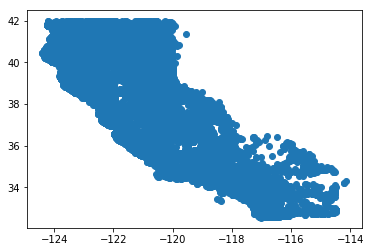

In [60]:
plt.scatter(fire_data['LONGITUDE'], fire_data['LATITUDE'], cmap = fire_data['CLUSTER']) 
plt.show()

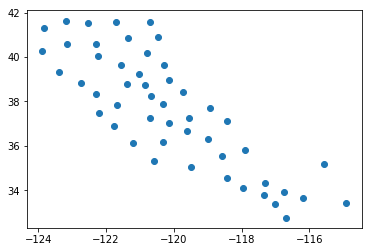

In [64]:
plt.scatter(centers[:,1],centers[:,0]) 
plt.show()

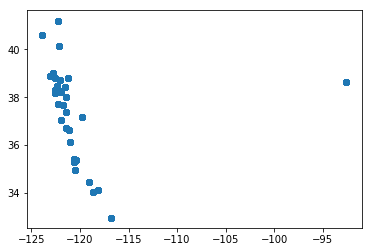

In [61]:
plt.scatter(wine_data['lon'], wine_data['lat']) 
plt.show()

In [48]:
wine_data.shape[0]

9757

In [54]:
# want # of fires in the previous year
#  sum of all fire sizes
wine_data['total_fires'] = 0
wine_data['sum_fire_size'] = 0

matched_cluster = 0
c = 0
temp = 0
total = wine_data.shape[0]
temp_dist = 10000

start = time.time()
for w_index, w_row in wine_data.iterrows():
    wine_latlng = wine_data.loc[w_index,['lat','lon']]
    for latlng in centers:
        dist = distance.euclidean(wine_latlng, latlng)
        if(dist < temp_dist):
            temp_dist = dist
            matched_cluster = c
        c += 1
    temp_dist = 10000
    c = 0 
    finished += 1
    if(finished%100 == 0):
        print('finished' , finished, '/', wine_data.shape[0], ' --- time elapsed:', time.time() - start)
    query = 'CLUSTER == ' + str(matched_cluster) + ' and FIRE_YEAR == ' + str(w_row['vintage']-1)
    query_data = fire_data.query(query)
    for f_index, f_row in query_data.iterrows():
                wine_data.loc[w_index, 'total_fires'] += 1
                wine_data.loc[w_index, 'sum_fire_size'] += fire_data.loc[f_index, 'FIRE_SIZE']


finished 100 / 9757  --- time elapsed: 16.26383900642395
finished 200 / 9757  --- time elapsed: 32.827434062957764
finished 300 / 9757  --- time elapsed: 48.39069223403931
finished 400 / 9757  --- time elapsed: 64.25554609298706
finished 500 / 9757  --- time elapsed: 79.79863238334656
finished 600 / 9757  --- time elapsed: 94.56479525566101
finished 700 / 9757  --- time elapsed: 110.77893304824829
finished 800 / 9757  --- time elapsed: 124.40655612945557
finished 900 / 9757  --- time elapsed: 138.93309426307678
finished 1000 / 9757  --- time elapsed: 150.20378017425537
finished 1100 / 9757  --- time elapsed: 166.38114833831787
finished 1200 / 9757  --- time elapsed: 182.13279914855957
finished 1300 / 9757  --- time elapsed: 196.92457604408264
finished 1400 / 9757  --- time elapsed: 212.3681070804596
finished 1500 / 9757  --- time elapsed: 225.57658505439758
finished 1600 / 9757  --- time elapsed: 240.55067229270935
finished 1700 / 9757  --- time elapsed: 255.00390219688416
finished 180

In [55]:
wine_data.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,country,description,designation,points,price,province,region_1,...,title,variety,winery,province_id,variety_numerical,vintage,lat,lon,total_fires,sum_fire_size
0,0,10,10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,Napa Valley,...,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature,7,80,2011,38.297137,-122.285529,0,0.00
3,3,23,23,US,This wine from the Geneseo district offers aro...,Signature Selection,87,22.0,California,Paso Robles,...,Bianchi 2011 Signature Selection Merlot (Paso ...,Merlot,Bianchi,7,326,2011,37.050096,-121.990591,4,79.10
4,4,25,25,US,Oak and earth intermingle around robust aromas...,King Ridge Vineyard,87,69.0,California,Sonoma Coast,...,Castello di Amorosa 2011 King Ridge Vineyard P...,Pinot Noir,Castello di Amorosa,7,440,2011,38.293313,-122.469386,0,0.00
12,12,60,60,US,"Syrupy and dense, this wine is jammy in plum a...",Estate,86,100.0,California,Napa Valley,...,Okapi 2013 Estate Cabernet Sauvignon (Napa Val...,Cabernet Sauvignon,Okapi,7,80,2013,38.297137,-122.285529,122,1339.78
13,13,63,64,US,There are intriguing touches to the nose of th...,Golden Horn,86,26.0,California,Santa Ynez Valley,...,Sevtap 2015 Golden Horn Sauvignon Blanc (Santa...,Sauvignon Blanc,Sevtap,7,514,2015,35.282753,-120.659616,82,719.08


In [57]:
wine_dict = dict()
for index, row in wine_data.iterrows():
    if row['total_fires'] in wine_dict:
        wine_dict[row['total_fires']] += 1
    else:
        wine_dict[row['total_fires']] = 1
    

wine_dict = sorted(wine_dict.items(), key=lambda kv: kv[1])
wine_dict = list(reversed(wine_dict))
wine_dict

[(122, 1332),
 (202, 1103),
 (247, 1089),
 (0, 388),
 (136, 367),
 (171, 353),
 (192, 283),
 (146, 249),
 (224, 244),
 (161, 240),
 (128, 201),
 (4, 170),
 (111, 158),
 (2, 156),
 (179, 154),
 (130, 139),
 (1, 138),
 (59, 135),
 (181, 133),
 (134, 121),
 (255, 117),
 (305, 111),
 (259, 101),
 (164, 100),
 (108, 97),
 (166, 93),
 (325, 90),
 (53, 85),
 (6, 82),
 (219, 73),
 (196, 71),
 (328, 70),
 (120, 70),
 (144, 67),
 (78, 65),
 (64, 64),
 (154, 56),
 (13, 54),
 (69, 54),
 (102, 49),
 (52, 49),
 (7, 49),
 (180, 46),
 (101, 45),
 (150, 42),
 (55, 42),
 (220, 42),
 (67, 41),
 (75, 40),
 (82, 39),
 (57, 29),
 (99, 28),
 (33, 27),
 (35, 26),
 (340, 26),
 (54, 25),
 (84, 23),
 (29, 22),
 (121, 21),
 (48, 21),
 (158, 20),
 (109, 19),
 (24, 18),
 (177, 18),
 (74, 17),
 (40, 16),
 (25, 15),
 (448, 14),
 (10, 14),
 (147, 13),
 (38, 13),
 (72, 12),
 (106, 9),
 (21, 9),
 (28, 9),
 (115, 9),
 (131, 9),
 (58, 8),
 (34, 8),
 (174, 8),
 (88, 7),
 (107, 7),
 (3, 7),
 (46, 7),
 (36, 6),
 (127, 6),
 (

In [58]:
wine_data.to_csv('../data/California_latlng_merged.csv')